In [9]:
import numpy as np
import matplotlib.pyplot as plt

# http://yann.lecun.com/exdb/mnist/

First 25 Digit Images


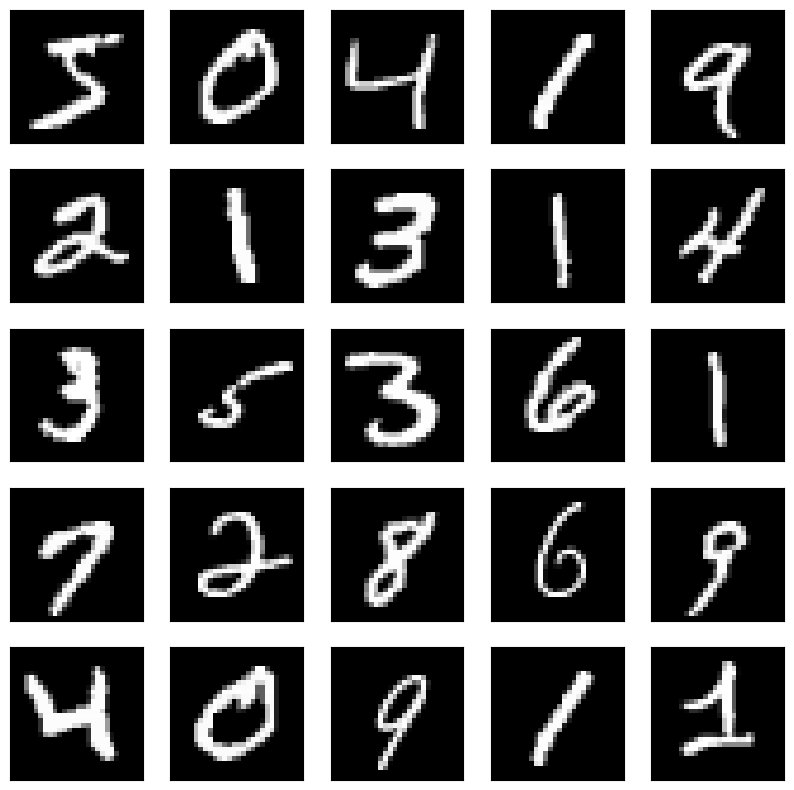

First Image Dump Data:

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0 

In [10]:
#------------------------------------------------------------------------------
# Read Digit Images
#------------------------------------------------------------------------------
def read_idx(filename):

  with open(filename, 'rb') as file:
    magic = int.from_bytes(file.read(4), 'big')               # マジックナンバーを読み込む
    num = int.from_bytes(file.read(4), 'big')                 # 画像の数
    rows = int.from_bytes(file.read(4), 'big')                # 画像の行数
    cols = int.from_bytes(file.read(4), 'big')                # 画像の列数
    images = np.frombuffer(file.read(), dtype=np.uint8).reshape(num, rows, cols)
  return images

#------------------------------------------------------------------------------
# Read Trueth Labels
#------------------------------------------------------------------------------
def read_labels(filename):

  with open(filename, 'rb') as file:
    magic = int.from_bytes(file.read(4), 'big')               # マジックナンバーを読み込む
    num = int.from_bytes(file.read(4), 'big')                 # ラベルの数を読み込む
    labels = np.frombuffer(file.read(), dtype=np.uint8)       # 残りのデータを読み込む
  return labels

#------------------------------------------------------------------------------
# Main
#------------------------------------------------------------------------------
x_train = read_idx('./mnist_data/train-images.idx3-ubyte')
y_train = read_labels('./mnist_data/train-labels.idx1-ubyte')
x_test = read_idx('./mnist_data/t10k-images.idx3-ubyte')
y_test = read_labels('./mnist_data/t10k-labels.idx1-ubyte')

print("First 25 Digit Images")

plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap='gray')
plt.show()

print("First Image Dump Data:")
print()

first_image = x_train[0]

for row in first_image:
  formatted_row = ' '.join(f'{num:3}' for num in row)
  print(formatted_row)

print()
print("Loaded labels:", y_train[0:25])
print("Number of labels:", len(y_train))

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt

First 25 Digit Images


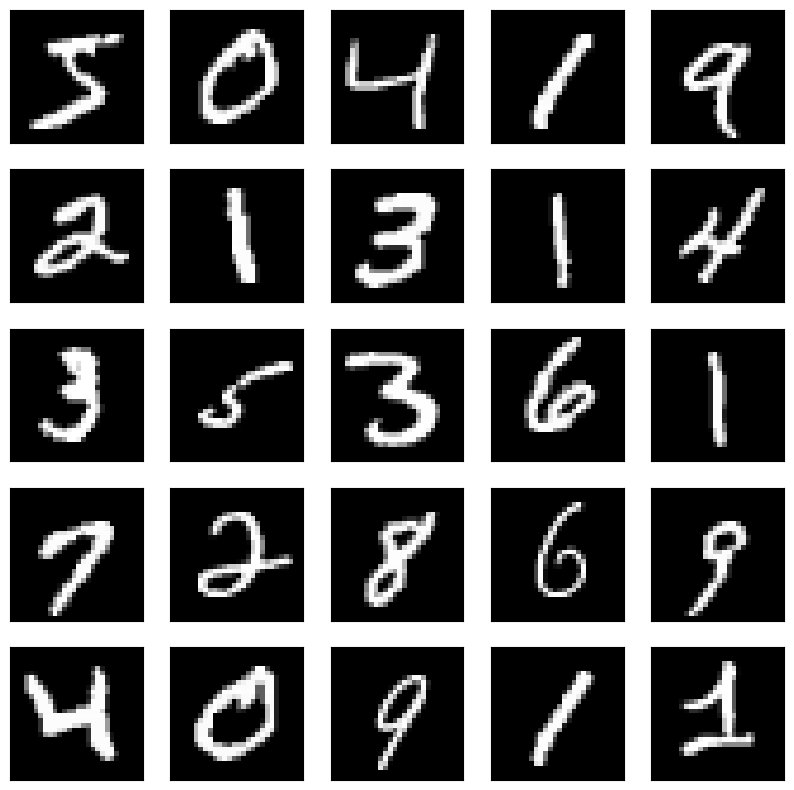

First Image Dump Data:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0  

In [12]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("First 25 Digit Images")

plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap='gray')
#  plt.xlabel(y_train[i])
plt.show()

print("First Image Dump Data:")

first_image = x_train[0]

for row in first_image:
  formatted_row = ' '.join(f'{num:3}' for num in row)
  print(formatted_row)

print()
print("Loaded labels:", y_train[0:25])
print("Number of labels:", len(y_train))

In [13]:
#------------------------------------------------------------------------------
# Preprocessing Training Data
#------------------------------------------------------------------------------
print(x_train.shape)                           # 28*28 の 2 次元データ（60000 枚）
print(y_train.shape)                           # ただのスカラーデータ（60000 個）

x_train_reshaped = x_train.reshape(-1, 784)    # 1 次元データへ変更
y_train_reshaped = y_train.reshape(-1, 1)      # 1 次元データへ変更

x_train_normalized = x_train_reshaped / 255.0  # 標準化
y_train_categorized = np.eye(10)[y_train]      # 単位行列化

print(x_train_normalized.shape)
print(y_train_categorized.shape)
print()

#------------------------------------------------------------------------------
# Preprocessing Test Data
#------------------------------------------------------------------------------
print(x_test.shape)                            # 28*28 の 2 次元データ（10000 枚）
print(y_test.shape)                            # ただのスカラーデータ（10000 個）

x_test_reshaped = x_test.reshape(-1, 784)      # 1 次元データへ変更
y_test_reshaped = y_test.reshape(-1, 1)        # 1 次元データへ変更

x_test_normalized = x_test_reshaped / 255.0    # 標準化
y_test_categorized = np.eye(10)[y_test]        # 単位行列化

print(x_test_normalized.shape)
print(y_test_categorized.shape)
print()

(60000, 28, 28)
(60000,)
(60000, 784)
(60000, 10)

(10000, 28, 28)
(10000,)
(10000, 784)
(10000, 10)



In [14]:
#------------------------------------------------------------------------------
# Neural Network
#------------------------------------------------------------------------------
class NeuralNetwork:

  def __init__(self, input_size, hidden_size, output_size):

    self.hidden_weight = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)          # He 初期化
    self.hidden_bias = np.zeros((1, hidden_size))

    self.output_weight = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)        # He 初期化
    self.output_bias = np.zeros((1, output_size))

  def func_relu(self, x):
    y = np.maximum(0, x)
    return y

  def func_relu_deriv(self, x):
    y = np.where(x > 0, 1, 0)
    return y

  def func_softmax(self, x):
    exp_x = np.exp(x - np.max(x))
    y = exp_x / np.sum(exp_x, axis=1, keepdims=True)
    return y

  def func_forward(self, x_data):

    ans = np.dot(x_data, self.hidden_weight) + self.hidden_bias
    hidden_data = self.func_relu(ans)

    ans = np.dot(hidden_data, self.output_weight) + self.output_bias
    output_data = self.func_softmax(ans)

    return hidden_data, output_data

  def func_backward(self, x_data, y_data, hidden_data, output_data):

    learning_rate = 0.1

    output_loss = output_data - y_data
    output_weight = hidden_data.T.dot(output_loss)
    output_bias = np.sum(output_loss, axis=0)

    hidden_loss = output_loss.dot(self.output_weight.T) * self.func_relu_deriv(hidden_data)
    hidden_weight = x_data.T.dot(hidden_loss)
    hidden_bias = np.sum(hidden_loss, axis=0)

    self.output_weight -= learning_rate * output_weight / len(x_data)
    self.output_bias -= learning_rate * output_bias / len(x_data)

    self.hidden_weight -= learning_rate * hidden_weight / len(x_data)
    self.hidden_bias -= learning_rate * hidden_bias / len(x_data)

  def func_train(self, x_data, y_data):

    batch_size = 100
    epochs = 10

    for epoch_count in range(epochs):
      for batch_count in range(0, len(x_data), batch_size):
        x_batch = x_data[batch_count: batch_count + batch_size]
        y_batch = y_data[batch_count: batch_count + batch_size]
        hidden_data, output_data = self.func_forward(x_batch)
        self.func_backward(x_batch, y_batch, hidden_data, output_data)

      _, output_data = self.func_forward(x_data)
      acc_score = np.mean(np.argmax(output_data, axis=1) == np.argmax(y_data, axis=1))
      loss_value = np.mean(-y_data * np.log(output_data))
      print(f'Epoch {epoch_count + 1}, Loss: {loss_value:.4f}, Accuracy: {acc_score:.4f}')

  def func_predict(self, x_data):
    _, output_data = self.func_forward(x_data)
    return np.argmax(output_data, axis=1)

#------------------------------------------------------------------------------
# Main
#------------------------------------------------------------------------------
neural_network = NeuralNetwork(784, 128, 10)
neural_network.func_train(x_train_normalized, y_train_categorized)

y_pred = neural_network.func_predict(x_test_normalized)
acc_score = np.mean(y_pred == y_test)

print(f'Accuracy Score: {acc_score:.4f}')

print(y_test[:10])
print(y_pred[:10])

Epoch 1, Loss: 0.0279, Accuracy: 0.9184
Epoch 2, Loss: 0.0213, Accuracy: 0.9386
Epoch 3, Loss: 0.0173, Accuracy: 0.9496
Epoch 4, Loss: 0.0146, Accuracy: 0.9585
Epoch 5, Loss: 0.0126, Accuracy: 0.9641
Epoch 6, Loss: 0.0112, Accuracy: 0.9683
Epoch 7, Loss: 0.0100, Accuracy: 0.9719
Epoch 8, Loss: 0.0092, Accuracy: 0.9743
Epoch 9, Loss: 0.0084, Accuracy: 0.9762
Epoch 10, Loss: 0.0077, Accuracy: 0.9783
Accuracy Score: 0.9719
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


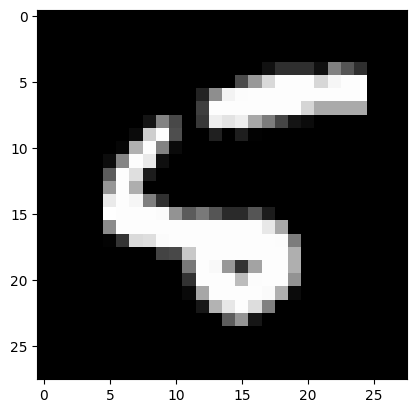

5


In [15]:
plt.imshow(x_test[8], cmap='gray')
plt.show()
print(y_test[8])